In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [110]:
df=pd.read_csv(r"C:\Users\nihar\OneDrive\Documents\College\5th sem\Machine learning\Lab\24th may lab\Fertilizer Prediction.csv")
df

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea
...,...,...,...,...,...,...,...,...,...
94,25,50,32,Clayey,Pulses,24,0,19,28-28
95,30,60,27,Red,Tobacco,4,17,17,10-26-26
96,38,72,51,Loamy,Wheat,39,0,0,Urea
97,36,60,43,Sandy,Millets,15,0,41,DAP


In [111]:
df.corr()

C:\Users\nihar\AppData\Local\Temp\ipykernel_12828\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
Temparature,1.000000,0.973164,0.091222,-0.033771,-0.023424,0.207545
Humidity,0.973164,1.000000,0.091342,-0.060646,-0.003833,0.204044
Moisture,0.091222,0.091342,1.000000,-0.095945,0.027727,0.009276
Nitrogen,-0.033771,-0.060646,-0.095945,1.000000,-0.500087,-0.686971
Potassium,-0.023424,-0.003833,0.027727,-0.500087,1.000000,0.089192
Phosphorous,0.207545,0.204044,0.009276,-0.686971,0.089192,1.000000


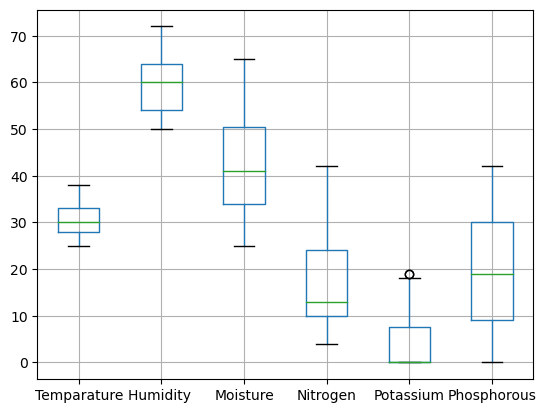

In [112]:
boxplot1 = df.boxplot()

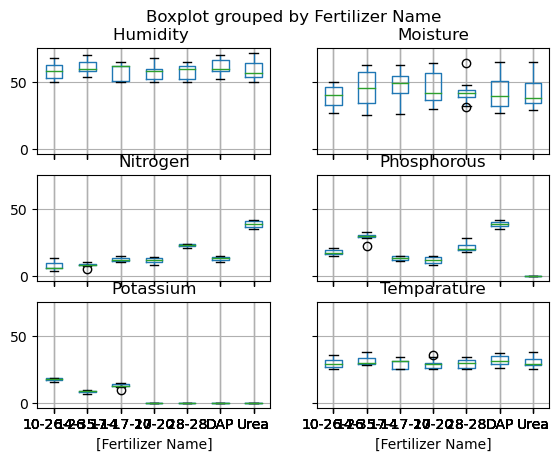

In [113]:
boxplot = df.boxplot(by='Fertilizer Name')

In [114]:
nanval=df.isnull().sum()
nanval

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [115]:
dfs=pd.get_dummies(df["Soil Type"])
dfc=pd.get_dummies(df["Crop Type"])
dff=df["Fertilizer Name"]
#dff=pd.get_dummies(df["Fertilizer Name"])
colsa=[df,dfs,dfc,dff]
dff

0         Urea
1          DAP
2     14-35-14
3        28-28
4         Urea
        ...   
94       28-28
95    10-26-26
96        Urea
97         DAP
98       20-20
Name: Fertilizer Name, Length: 99, dtype: object

In [116]:
colsd=["Soil Type","Crop Type","Fertilizer Name"]
df.drop(colsd, axis=1,inplace=True)
df

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
0,26,52,38,37,0,0
1,29,52,45,12,0,36
2,34,65,62,7,9,30
3,32,62,34,22,0,20
4,28,54,46,35,0,0
...,...,...,...,...,...,...
94,25,50,32,24,0,19
95,30,60,27,4,17,17
96,38,72,51,39,0,0
97,36,60,43,15,0,41


In [117]:
df=pd.concat(colsa, axis=1)
df

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Black,Clayey,Loamy,Red,...,Ground Nuts,Maize,Millets,Oil seeds,Paddy,Pulses,Sugarcane,Tobacco,Wheat,Fertilizer Name
0,26,52,38,37,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Urea
1,29,52,45,12,0,36,0,0,1,0,...,0,0,0,0,0,0,1,0,0,DAP
2,34,65,62,7,9,30,1,0,0,0,...,0,0,0,0,0,0,0,0,0,14-35-14
3,32,62,34,22,0,20,0,0,0,1,...,0,0,0,0,0,0,0,1,0,28-28
4,28,54,46,35,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,Urea
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,25,50,32,24,0,19,0,1,0,0,...,0,0,0,0,0,1,0,0,0,28-28
95,30,60,27,4,17,17,0,0,0,1,...,0,0,0,0,0,0,0,1,0,10-26-26
96,38,72,51,39,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,Urea
97,36,60,43,15,0,41,0,0,0,0,...,0,0,1,0,0,0,0,0,0,DAP


In [118]:
x=df.iloc[:,:22]
y=df.iloc[:,22]
x

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Black,Clayey,Loamy,Red,...,Cotton,Ground Nuts,Maize,Millets,Oil seeds,Paddy,Pulses,Sugarcane,Tobacco,Wheat
0,26,52,38,37,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,29,52,45,12,0,36,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,34,65,62,7,9,30,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,32,62,34,22,0,20,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,28,54,46,35,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,25,50,32,24,0,19,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
95,30,60,27,4,17,17,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
96,38,72,51,39,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
97,36,60,43,15,0,41,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [119]:
type(y)

pandas.core.series.Series

In [120]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [121]:
x_train

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Black,Clayey,Loamy,Red,...,Cotton,Ground Nuts,Maize,Millets,Oil seeds,Paddy,Pulses,Sugarcane,Tobacco,Wheat
49,33,64,51,5,9,29,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
70,26,52,39,21,0,23,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
68,25,50,40,6,19,16,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
15,31,62,49,10,13,14,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
39,29,58,34,15,0,37,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,28,54,41,36,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
71,31,62,32,39,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
14,26,52,31,14,0,41,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
92,36,68,41,41,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [122]:
from sklearn.linear_model import LogisticRegression
regressor=LogisticRegression(max_iter=10000)
regressor.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [123]:
log_y_pred=regressor.predict(x_test)
log_y_pred

array(['28-28', '20-20', '10-26-26', 'Urea', 'DAP', '28-28', 'Urea',
       '28-28', 'DAP', 'Urea', 'DAP', '28-28', '28-28', '14-35-14', 'DAP',
       'Urea', 'DAP', 'Urea', '10-26-26', 'Urea'], dtype=object)

In [124]:
log_df_pred=pd.DataFrame({'Actual':y_test,'Predicted':log_y_pred})
log_df_pred

,Actual,Predicted
62,28-28,28-28
40,20-20,20-20
95,10-26-26,10-26-26
18,Urea,Urea
97,DAP,DAP
84,28-28,28-28
64,Urea,Urea
42,28-28,28-28
10,DAP,DAP
0,Urea,Urea


In [126]:
filename = 'log_model.sav'
pickle.dump(regressor, open(filename, 'wb'))

In [127]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, log_y_pred)

1.0

In [128]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
knn_y_pred=regressor.predict(x_test)
knn_y_pred

array(['28-28', '20-20', '10-26-26', 'Urea', 'DAP', '28-28', 'Urea',
       '28-28', 'DAP', 'Urea', 'DAP', '28-28', '28-28', '14-35-14', 'DAP',
       'Urea', 'DAP', 'Urea', '10-26-26', 'Urea'], dtype=object)

In [129]:
knn_df_pred=pd.DataFrame({'Actual':y_test,'Predicted':knn_y_pred})
knn_df_pred

,Actual,Predicted
62,28-28,28-28
40,20-20,20-20
95,10-26-26,10-26-26
18,Urea,Urea
97,DAP,DAP
84,28-28,28-28
64,Urea,Urea
42,28-28,28-28
10,DAP,DAP
0,Urea,Urea


In [130]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, knn_y_pred)

1.0

In [131]:
filename = 'knn_model.sav'
pickle.dump(knn, open(filename, 'wb'))

In [132]:
from sklearn.neighbors import KNeighborsClassifier
knn2 = KNeighborsClassifier(n_neighbors=3)
knn2.fit(x_train, y_train)
knn2_y_pred=regressor.predict(x_test)
knn2_y_pred

array(['28-28', '20-20', '10-26-26', 'Urea', 'DAP', '28-28', 'Urea',
       '28-28', 'DAP', 'Urea', 'DAP', '28-28', '28-28', '14-35-14', 'DAP',
       'Urea', 'DAP', 'Urea', '10-26-26', 'Urea'], dtype=object)

In [133]:
knn2_df_pred=pd.DataFrame({'Actual':y_test,'Predicted':knn2_y_pred})
knn2_df_pred

,Actual,Predicted
62,28-28,28-28
40,20-20,20-20
95,10-26-26,10-26-26
18,Urea,Urea
97,DAP,DAP
84,28-28,28-28
64,Urea,Urea
42,28-28,28-28
10,DAP,DAP
0,Urea,Urea


In [134]:
accuracy_score(y_test, knn2_y_pred)

1.0

In [136]:
filename = 'knn2_model.sav'
pickle.dump(knn2, open(filename, 'wb'))

In [144]:
filename = 'log_model.sav'
log= pickle.load(open(filename, 'rb'))
result = log.score(x_test, y_test)
result

1.0

In [172]:
x=[]
for i in range(0, 22):
    ele = int(input())
    x.append(ele)


12
32
44
52
19
23
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0


In [173]:
cols=x_test.columns.values
cols
#colss = pd.Series(cols)
colst=np.transpose(cols)
colst

array(['Temparature', 'Humidity ', 'Moisture', 'Nitrogen', 'Potassium',
       'Phosphorous', 'Black', 'Clayey', 'Loamy', 'Red', 'Sandy',
       'Barley', 'Cotton', 'Ground Nuts', 'Maize', 'Millets', 'Oil seeds',
       'Paddy', 'Pulses', 'Sugarcane', 'Tobacco', 'Wheat'], dtype=object)

In [174]:
x
x_trial = pd.DataFrame(x)
x_trial=np.transpose(x_trial)
x_trial.columns=colst
x_trial

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Black,Clayey,Loamy,Red,...,Cotton,Ground Nuts,Maize,Millets,Oil seeds,Paddy,Pulses,Sugarcane,Tobacco,Wheat
0,12,32,44,52,19,23,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [177]:
user_pred=log.predict(x_trial)
user_pred

array(['28-28'], dtype=object)